In [1]:
from fit import *
import matplotlib.pyplot as plt
%matplotlib widget
from utils import plot_event, plot_generator, get_data_files, preceding_noise_files
from counter_config import CounterConfig, init_config
import CHASM as ch

In [2]:
data_date_and_time = '20230618050455'
cfg = init_config(data_date_and_time)

In [3]:
len(cfg.active_counters)

10

In [4]:
pe = ProcessEvents(cfg, frozen_noise=True)
corsika_file = '/home/isaac/NIZ/full_corsika/iact_DAT000002.dat'
real_nfits = pe.gen_nfits_from_ei(corsika_file)

In [5]:
# corsika_file = '/home/isaac/NIZ/tilefiles/batch2/iact_DAT000063.dat'
ei = ch.EventioWrapper(corsika_file)
# real_nfits = pe.gen_nfits_from_tf(ei,cfg.counter_center)

print(ei.X[ei.nch.argmax()])
print(ei.nch.max())
print(ei.theta)



576.0
2550328.8
0.6789331


In [6]:
[f.name for f in real_nfits]

['bardeen',
 'bell',
 'curie',
 'newton',
 'noether',
 'rossi',
 'rubin',
 'rutherford',
 'wu']

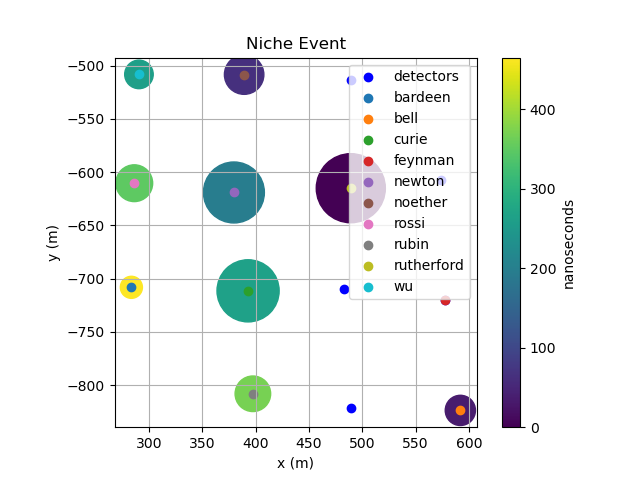

In [7]:
ty = tyro(real_nfits)
pf = NichePlane(real_nfits)
plot_event(ty)
for c in cfg.positions:
    plt.scatter(cfg.positions[c][0],cfg.positions[c][1],label=c)
plt.legend()

In [8]:
import CHASM as ch
ei = ch.EventioWrapper(corsika_file)
xmax = ei.X[ei.nch.argmax()]
nmax = ei.nch.max()
theta = ei.theta
phi = ei.phi
core = cfg.counter_center
pars = [xmax,nmax,theta,phi,*core,0,70,0.]
print(pars)
print(np.rad2deg(theta))
print(np.rad2deg(phi))

[576.0, 2550328.8, 0.6789331, 0.5270895083718976, 407.7, -663.2500000000001, -25.1, 0, 70, 0.0]
38.899998
30.200004255335205


In [9]:
guess = make_guess(ty, pf,cfg)
[print(p) for p in guess];

FitParam(name='xmax', value=500.0, limits=(400.0, 800.0), error=50.0, fixed=False)
FitParam(name='nmax', value=1000000.0, limits=(10000.0, 100000000.0), error=100000.0, fixed=False)
FitParam(name='zenith', value=0.6649741871464911, limits=(0.0, 0.7649741871464911), error=0.017453292519943295, fixed=False)
FitParam(name='azimuth', value=0.5351092451539926, limits=(0.43510924515399263, 0.6351092451539926), error=0.017453292519943295, fixed=False)
FitParam(name='corex', value=421.9168869522434, limits=(379.5, 489.2), error=5.0, fixed=False)
FitParam(name='corey', value=-630.983249863192, limits=(-711.4, -508.5), error=5.0, fixed=False)
FitParam(name='corez', value=-29.0, limits=(-29.0, -29.0), error=1.0, fixed=True)
FitParam(name='x0', value=0.0, limits=(0, 0), error=1, fixed=True)
FitParam(name='lambda', value=70.0, limits=(60.0, 80.0), error=1, fixed=True)
FitParam(name='t_offset', value=0.0, limits=(-450.0, 450.0), error=10.0, fixed=False)


In [10]:
guess = BasicParams.adjust_guess(guess)

In [11]:
# guess = update_guess(m)
pt = PeakTimes(real_nfits, BasicParams, cfg)
pt.target_parameters = ['zenith','azimuth']
m = init_minuit(pt, guess)
m.simplex(ncall=40)

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 101.1 (χ²/ndof = 14.4)     │              Nfcn = 40               │
│ EDM = 0.507 (Goal: 0.1)          │           time = 14.8 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │    500    │    50     │            │            │   400   │   800   │  yes  │
│ 1 │ nmax     │   1.0e6   │   0.1e6   │            │            │  10000  │  1e+08  │  yes  │
│ 2 │ zenith   │ 677.52e-3 │  0.09e-3  │            │            │    0    │0.764974 │       │
│ 3 │ azimuth  │ 517.9e-3  │  0.4e-3   │            │            │0.435109 │0.635109 │       │
│ 4 │ corex    │    422    │     5     │            │            │  379.5  │  489.2  │  yes  │
│ 5 │ corey    │   -631    │     5     │            │            │ -711.4  │ -508.5  │  yes  │
│ 6 │ corez    │    -29    │     1     │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │   60    │   80    │  yes  │
│ 9 │ t_offset │     0     │    10     │            │            │  -450   │   450   │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [12]:
tpguess = update_guess(m)
pw = PulseWidth(real_nfits, BasicParams, cfg)
pw.target_parameters = ['xmax']
m = init_minuit(pw, tpguess)
m.simplex(ncall=40)

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 69.45 (χ²/ndof = 8.7)      │              Nfcn = 15               │
│ EDM = 0.0339 (Goal: 0.1)         │            time = 5.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │    439    │    24     │            │            │   400   │   800   │       │
│ 1 │ nmax     │   1.0e6   │   0.1e6   │            │            │  10000  │  1e+08  │  yes  │
│ 2 │ zenith   │ 677.52e-3 │  0.09e-3  │            │            │    0    │0.764974 │  yes  │
│ 3 │ azimuth  │ 517.9e-3  │  0.4e-3   │            │            │0.435109 │0.635109 │  yes  │
│ 4 │ corex    │    422    │     5     │            │            │  379.5  │  489.2  │  yes  │
│ 5 │ corey    │   -631    │     5     │            │            │ -711.4  │ -508.5  │  yes  │
│ 6 │ corez    │    -29    │     1     │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │   60    │   80    │  yes  │
│ 9 │ t_offset │     0     │    10     │            │            │  -450   │   450   │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [13]:
xmaxguess = update_guess(m)
pa = PulseArea(real_nfits, BasicParams, cfg)
pa.target_parameters = ['nmax']
m = init_minuit(pa, xmaxguess)
m.simplex(ncall=20)

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 880.6 (χ²/ndof = 110.1)    │              Nfcn = 22               │
│ EDM = 2.62 (Goal: 0.1)           │            time = 8.5 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           ABOVE call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │    439    │    24     │            │            │   400   │   800   │  yes  │
│ 1 │ nmax     │  5.31e6   │  0.06e6   │            │            │  10000  │  1e+08  │       │
│ 2 │ zenith   │ 677.52e-3 │  0.09e-3  │            │            │    0    │0.764974 │  yes  │
│ 3 │ azimuth  │ 517.9e-3  │  0.4e-3   │            │            │0.435109 │0.635109 │  yes  │
│ 4 │ corex    │    422    │     5     │            │            │  379.5  │  489.2  │  yes  │
│ 5 │ corey    │   -631    │     5     │            │            │ -711.4  │ -508.5  │  yes  │
│ 6 │ corez    │    -29    │     1     │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │   60    │   80    │  yes  │
│ 9 │ t_offset │     0     │    10     │            │            │  -450   │   450   │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [14]:
nmaxguess = update_guess(m)
pa = NormalizedPulseArea(real_nfits, BasicParams, cfg)
pa.target_parameters = ['xmax','nmax','corex','corey']
m = init_minuit(pa, nmaxguess)
m.simplex()

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 33.91 (χ²/ndof = 6.8)      │              Nfcn = 209              │
│ EDM = 0.0471 (Goal: 0.1)         │           time = 76.0 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │    542    │     4     │            │            │   400   │   800   │       │
│ 1 │ nmax     │  3.77e6   │  0.05e6   │            │            │  10000  │  1e+08  │       │
│ 2 │ zenith   │ 677.52e-3 │  0.09e-3  │            │            │    0    │0.764974 │  yes  │
│ 3 │ azimuth  │ 517.9e-3  │  0.4e-3   │            │            │0.435109 │0.635109 │  yes  │
│ 4 │ corex    │   439.8   │    2.2    │            │            │  379.5  │  489.2  │       │
│ 5 │ corey    │  -662.2   │    1.2    │            │            │ -711.4  │ -508.5  │       │
│ 6 │ corez    │    -29    │     1     │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │   60    │   80    │  yes  │
│ 9 │ t_offset │     0     │    10     │            │            │  -450   │   450   │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [15]:
guess = update_guess(m)
at = AllSamples(real_nfits, BasicParams, cfg)
at.target_parameters = ['t_offset']
m = init_minuit(at, guess)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6478 (χ²/ndof = 96.7)      │              Nfcn = 139              │
│ EDM = 3.51e+10 (Goal: 0.0002)    │           time = 41.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │    542    │     4     │            │            │   400   │   800   │  yes  │
│ 1 │ nmax     │  3.77e6   │  0.05e6   │            │            │  10000  │  1e+08  │  yes  │
│ 2 │ zenith   │ 677.52e-3 │  0.09e-3  │            │            │    0    │0.764974 │  yes  │
│ 3 │ azimuth  │ 517.9e-3  │  0.4e-3   │            │            │0.435109 │0.635109 │  yes  │
│ 4 │ corex    │   439.8   │    2.2    │            │            │  379.5  │  489.2  │  yes  │
│ 5 │ corey    │  -662.2   │    1.2    │            │            │ -711.4  │ -508.5  │  yes  │
│ 6 │ corez    │    -29    │     1     │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │   60    │   80    │  yes  │
│ 9 │ t_offset │   0.1e3   │   0.7e3   │            │            │  -450   │   450   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│          │     xmax     nmax   zenith  azimuth    corex    corey    corez       x0   lambda t_offset │
├──────────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│     xmax │        0        0        0        0        0        0        0        0        0        0 │
│     nmax │        0        0        0        0        0        0        0        0        0        0 │
│   zenith │        0        0        0        0        0        0        0        0        0        0 │
│  azimuth │        0        0        0        0        0        0        0        0        0        0 │
│    corex │        0        0        0        0        0        0        0        0        0        0 │
│    corey │        0        0        0        0        0        0        0        0        0        0 │
│    corez │        0        0        0        0        0        0        0        0        0        0 │
│       x0 │        0        0        0        0        0        0        0        0        0        0 │
│   lambda │        0        0        0        0        0        0        0        0        0        0 │
│ t_offset │        0        0        0        0        0        0        0        0        0 3.88e+05 │
└──────────┴───────────────────────────────────────────────────────────────────────────────────────────┘

In [16]:
m.tol=.01
m.fixed = True
m.fixed['xmax'] = False
m.fixed['nmax'] = False
m.fixed['zenith'] = False
m.fixed['azimuth'] = False
m.fixed['corex'] = False
m.fixed['corey'] = False
m.fixed['t_offset'] = True
# m.scan()
m.simplex()

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 761.4 (χ²/ndof = 12.3)     │              Nfcn = 394              │
│ EDM = 0.57 (Goal: 0.01)          │           time = 39.9 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │   531.0   │    1.6    │            │            │   400   │   800   │       │
│ 1 │ nmax     │  3.96e6   │  0.04e6   │            │            │  10000  │  1e+08  │       │
│ 2 │ zenith   │677.734e-3 │ 0.009e-3  │            │            │    0    │0.764974 │       │
│ 3 │ azimuth  │ 527.44e-3 │  0.14e-3  │            │            │0.435109 │0.635109 │       │
│ 4 │ corex    │  440.27   │   0.30    │            │            │  379.5  │  489.2  │       │
│ 5 │ corey    │  -662.8   │    0.5    │            │            │ -711.4  │ -508.5  │       │
│ 6 │ corez    │    -29    │     1     │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │   60    │   80    │  yes  │
│ 9 │ t_offset │   0.1e3   │   0.7e3   │            │            │  -450   │   450   │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [17]:
m.tol=.01
m.fixed = True
m.fixed['xmax'] = False
m.fixed['nmax'] = False
m.fixed['lambda'] = False
# m.scan()
m.simplex()

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 720.9 (χ²/ndof = 11.1)     │              Nfcn = 494              │
│ EDM = 0.00484 (Goal: 0.01)       │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │   543.0   │    1.2    │            │            │   400   │   800   │       │
│ 1 │ nmax     │  4.140e6  │  0.021e6  │            │            │  10000  │  1e+08  │       │
│ 2 │ zenith   │677.734e-3 │ 0.009e-3  │            │            │    0    │0.764974 │  yes  │
│ 3 │ azimuth  │ 527.44e-3 │  0.14e-3  │            │            │0.435109 │0.635109 │  yes  │
│ 4 │ corex    │  440.27   │   0.30    │            │            │  379.5  │  489.2  │  yes  │
│ 5 │ corey    │  -662.8   │    0.5    │            │            │ -711.4  │ -508.5  │  yes  │
│ 6 │ corez    │    -29    │     1     │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │   60.0    │    0.9    │            │            │   60    │   80    │       │
│ 9 │ t_offset │   0.1e3   │   0.7e3   │            │            │  -450   │   450   │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [18]:
fitpars = [p.value for p in m.params]
fit_ev = BasicParams.get_event(fitpars)
print(fit_ev)

Event(E=3184456182144567.5, Xmax=542.9539852074854, Nmax=4139793.036787938, zenith=0.6777339057617547, azimuth=0.5274376902587888, corex=440.27123250903156, corey=-662.7806059117696, corez=-29.0, X0=0.0, Lambda=60.00006675562508)


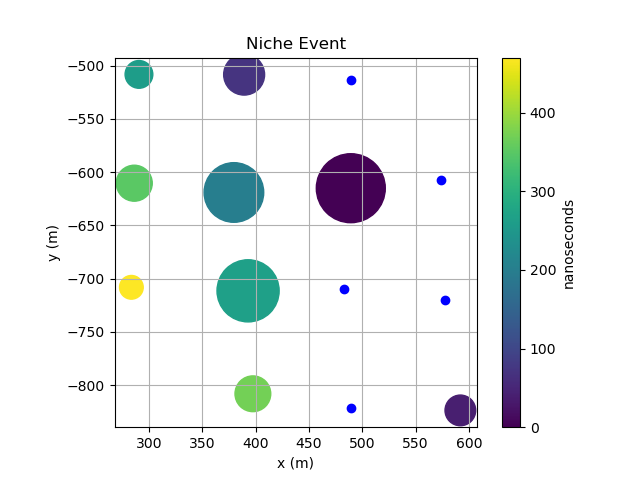

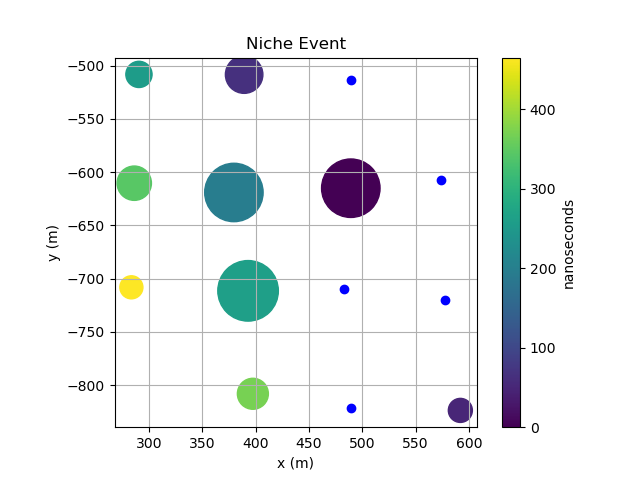

In [19]:
fit_nfits = pe.gen_nfits_from_event(fit_ev)
par_nfits = pe.gen_nfits_from_event(BasicParams.get_event(pars))
plot_event(tyro(fit_nfits))
plot_event(tyro(par_nfits))

In [20]:
from gen_ckv_signals import read_tilefile
c = read_tilefile(corsika_file,cfg)

In [21]:
c[2]

array([[-4.3842857e+01, -4.8221432e+01,  5.0507998e+00],
       [ 1.3755714e+02,  5.5878571e+01,  3.0507998e+00],
       [ 5.2557144e+01,  1.4917857e+02,  6.0508003e+00],
       [ 1.4075714e+02, -5.6821430e+01,  2.0508001e+00],
       [ 5.2957142e+01, -1.5782143e+02,  2.0508001e+00],
       [-5.7142857e+01,  4.4078568e+01,  3.0507998e+00],
       [-4.7542858e+01,  1.5467857e+02,  4.0507998e+00],
       [ 5.2557144e+01,  4.8078568e+01,  5.0799999e-02],
       [-1.4624286e+02,  1.5487857e+02,  3.0507998e+00],
       [ 4.6357143e+01, -4.6521431e+01,  4.0507998e+00],
       [-1.5334286e+02, -4.4921432e+01,  5.0507998e+00],
       [ 1.5535713e+02, -1.6042143e+02,  6.0508003e+00],
       [-1.5064287e+02,  5.2778568e+01,  8.0508003e+00],
       [-3.9342857e+01, -1.4482143e+02,  3.0507998e+00]], dtype=float32)

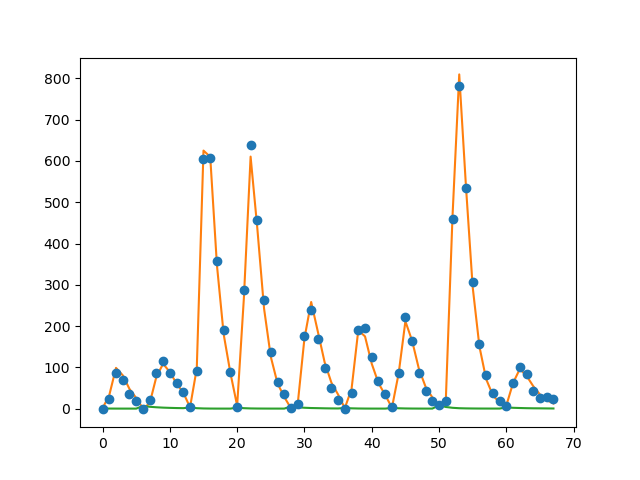

In [22]:
plt.figure()
fitpars = [p.value for p in m.params]
plt.errorbar(np.arange(len(at.real_values)),at.real_values,yerr=at.error, fmt="o")
plt.plot(at.get_output(fitpars))
pars[-1] = fitpars[-1]
plt.plot(at.get_output(pars))

In [23]:
at.biggest_counter

'rutherford'

In [24]:
# for f in at.nfits:
#     plt.figure()
#     plt.plot(f.waveform)
#     plt.hlines(f.baseline + f.baseline_error,0,1040, color='k')
#     plt.hlines(f.baseline,0,1040, color='r')
#     plt.vlines(f.start_rise, f.baseline,f.waveform.max())
#     plt.xlim(f.start_rise,f.end_fall)


In [25]:
ckv = at.ckv_from_params(pars)
sigdict, times = ckv_signal_dict(ckv, 0.)

for c in at.nfit_dict:
    sigdict[c][sigdict[c]>at.nfit_dict[c].max_value] = at.nfit_dict[c].max_value

times -= times[sigdict[at.biggest_counter].argmax()]

d = {name:at.trace_at_times(sigdict[name],times,realtimes) for name, realtimes in zip(at.nfit_dict,at.real_times_array)}

In [26]:
{c:sigdict[c].argmax() for c in sigdict}

{'bardeen': 5184,
 'bell': 5098,
 'curie': 5144,
 'feynman': 0,
 'newton': 5130,
 'noether': 5104,
 'rossi': 5161,
 'rubin': 5165,
 'rutherford': 5092,
 'wu': 5141}

In [27]:
# for c in sigdict:
#     plt.figure()
#     plt.plot(sigdict[c])
#     plt.title(c)

In [28]:
cfg.gains

{'bardeen': 0.5315022198848346,
 'bell': 2.03561860355875,
 'curie': 2.1898172638067352,
 'feynman': nan,
 'newton': 2.0268360736788305,
 'noether': 1.9630157342302252,
 'rossi': 1.3304955004632757,
 'rubin': 1.1453023943062968,
 'rutherford': 2.3429694496907567,
 'wu': 1.7198889408947446}

In [29]:
at.real_values[at.real_values>2.e3]

array([], dtype=float64)

In [30]:
# ei.input_card.decode()

In [31]:
cfg.active_counters

['bardeen',
 'bell',
 'curie',
 'feynman',
 'newton',
 'noether',
 'rossi',
 'rubin',
 'rutherford',
 'wu']

In [32]:
tel_arr = .01*np.array([[-15370.0, -4810.0, 500.0], [15500.0, -16360.0, 600.0], [-4420.0, -5140.0, 500.0], [13720.0, 5270.0, 300.0], [14040.0, -6000.0, 200.0], [5260.0, -16100.0, 200.0], [-5750.0, 4090.0, 300.0], [-4790.0, 15150.0, 400.0], [-15100.0, 4960.0, 800.0], [-3970.0, -14800.0, 300.0], [5220.0, 4490.0, 0.0], [4600.0, -4970.0, 400.0]])

In [33]:
tel_arr.shape

(12, 3)

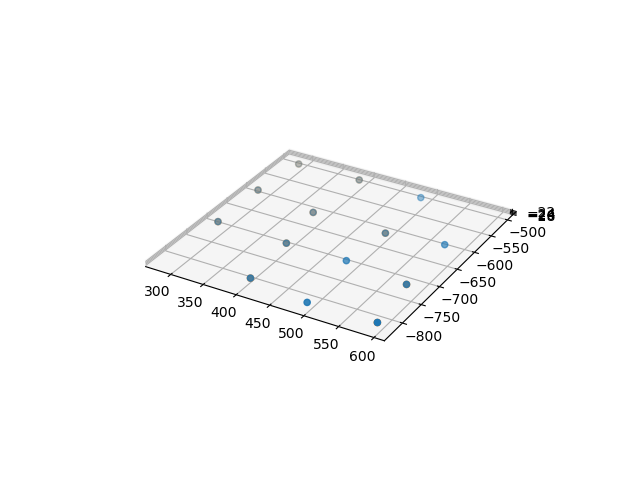

In [34]:
from gen_ckv_signals import counter_center, counter_bottom

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
counter_vectors = ei.counter_vectors + counter_bottom()
ax.scatter(counter_vectors[:,0],counter_vectors[:,1],counter_vectors[:,2])
ax.scatter(cfg.positions_array[:,0],cfg.positions_array[:,1],cfg.positions_array[:,2])
# ax.scatter(tel_arr[:,0],tel_arr[:,1],tel_arr[:,2])
ax.set_aspect('equal')

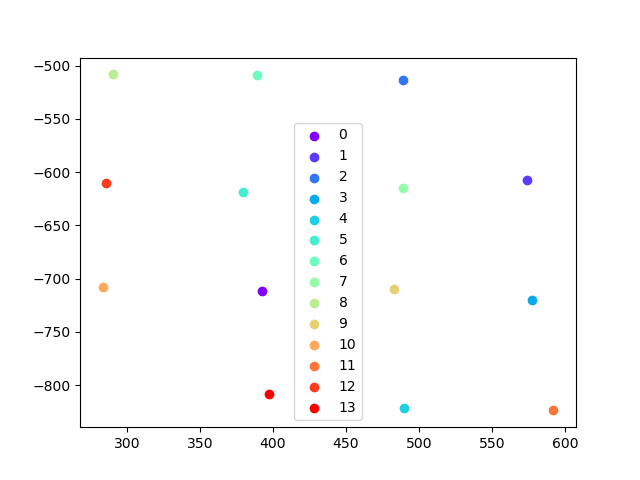

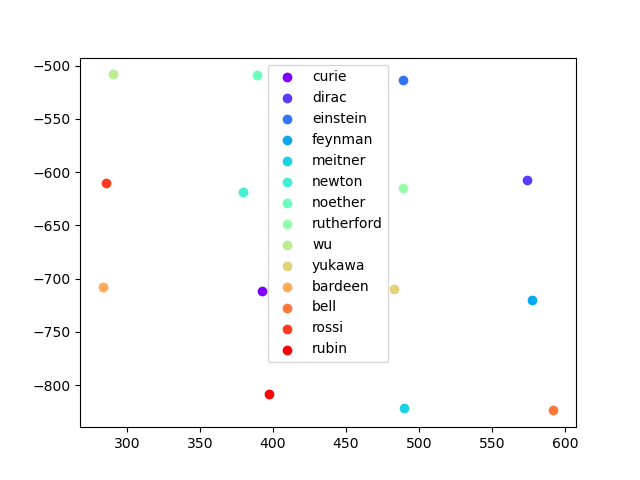

In [35]:
from config import COUNTER_POSITIONS_DICT
plt.figure()
c = np.arange(ei.n_telescopes)
colors = plt.cm.rainbow(c/c.max())
c2 = np.arange(len(cfg.active_counters))
colors2= plt.cm.rainbow(c2/c2.max())
for i in range(ei.n_telescopes):
    plt.scatter(counter_vectors[i,0],counter_vectors[i,1], label = i, color = colors[i])
plt.legend()
# plt.figure()
# for i,c in enumerate(cfg.positions):
#     plt.scatter(cfg.positions[c][0],cfg.positions[c][1],label=c, color = colors2[i])
# plt.legend()

plt.figure()
for i,c in enumerate(COUNTER_POSITIONS_DICT):
    plt.scatter(COUNTER_POSITIONS_DICT[c][0],COUNTER_POSITIONS_DICT[c][1],label=c, color = colors[i])
plt.legend()

In [36]:
ei.input_card.decode()

'* CORSIKA 7.741 + IACT/ATMO 1.63 (2020-12-04) inputs:\nRUNNR   000002                        NUMBER OF RUN\nEVTNR   1                             NO OF FIRST SHOWER EVENT\nSEED    900001  0  0                  SEED FOR HADRONIC PART\nSEED    900002  0  0                  SEED FOR EGS4 PART\nSEED    900003  0  0                  SEED FOR CHERENKOV PART\nSEED    900004  0  0                  SEED FOR CSCAT PART\nNSHOW   1                             NO OF SHOWERS TO SIMULATE\nPRMPAR  14                            PRIMARY PARTICLE CODE (PROTON)\nERANGE  3.94E+06 3.94E+06           ENERGY RANGE OF PRIMARY PARTICLE\nESLOPE  -1.0                          SLOPE OF ENERGY SPECTRUM\nTHETAP  3.890E+01 3.890E+01                       RANGE OF ZENITH ANGLE (DEG)\nPHIP    -1.498E+02 -1.498E+02                       RANGE OF AZIMUTH ANGLE (DEG)\nTHIN    1.0E-06 1.0E+2 0.0           THINNING PARAMETERS\nECUTS   0.3 0.3 0.001 0.001           ENERGY CUTS FOR PARTICLES (15 MEV FOR E, BELOW CHERENKOV TH

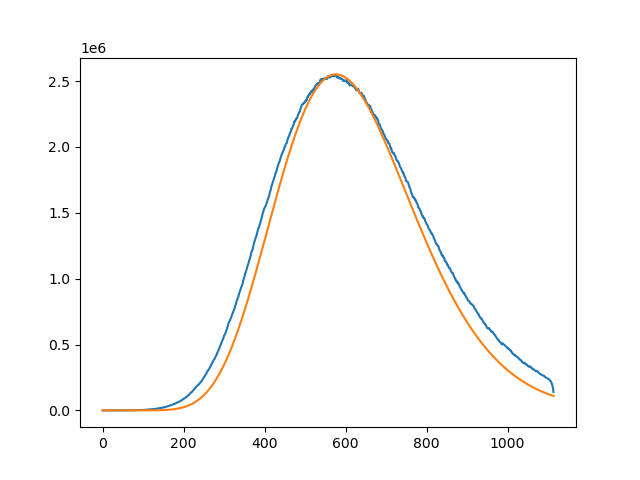

In [37]:
gh = ch.MakeGHShower(ei.X[ei.nch.argmax()],ei.nch.max(),0.,50.)

plt.figure()
plt.plot(ei.X,ei.nch)
plt.plot(ei.X,gh.profile(ei.X))